# Random Forest

由多個 decision tree 組合而成，每個 decision tree 皆是透過不同的 樣本、features 訓練而成 （就是一種集成學習！）

RF 可以拿來分類也可以做回歸。

In [20]:
import numpy as np
import matplotlib.pyplot as plt

## RandomForestClassifier()

In [21]:
from sklearn.datasets import make_moons
x, y = make_moons(n_samples=500, noise=0.3, random_state=1)

In [22]:
def plot_dataset(x, y, axes):
  plt.plot(x[y==0, 0], x[y==0, 1], "ro", markersize=3)
  plt.plot(x[y==1, 0], x[y==1, 1], "g^", markersize=3)
  plt.axis(axes)
  plt.grid(True, which='both')
  plt.xlabel(r"$x_1$", fontsize=20)
  plt.ylabel(r"$x_2$", fontsize=20)

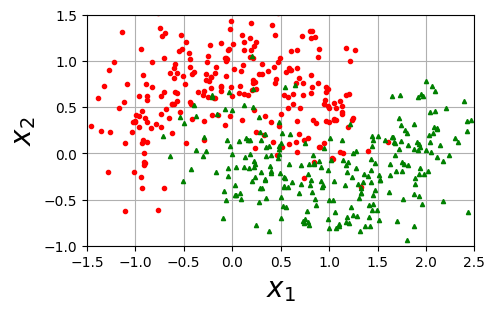

In [23]:
plt.figure(figsize=(5, 3))
plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [25]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(
  n_estimators=500, # 幾棵樹
  max_leaf_nodes=16,
  oob_score=True,
  random_state=1
)

rnd_clf.fit(x_train, y_train)

rnd_clf.score(x_train, y_train), rnd_clf.score(x_test, y_test)

(0.9573333333333334, 0.856)

In [26]:
rnd_clf.oob_score_

0.904

In [27]:
rnd_clf.feature_importances_

# [feature1 的重要性, feature2 的重要性]

array([0.41476042, 0.58523958])

In [28]:
def plot_decision_boundary(clf, x, y, axes):
  x1s = np.linspace(axes[0], axes[1], 100)
  x2s = np.linspace(axes[2], axes[3], 100)
  x1, x2 = np.meshgrid(x1s, x2s)
  x_new = np.c_[x1.ravel(), x2.ravel()]
  y_pred = clf.predict(x_new).reshape(x1.shape)

  plt.contourf(x1, x2, y_pred, alpha=0.2)
  plt.contour(x1, x2, y_pred)

  plot_dataset(x, y, axes)

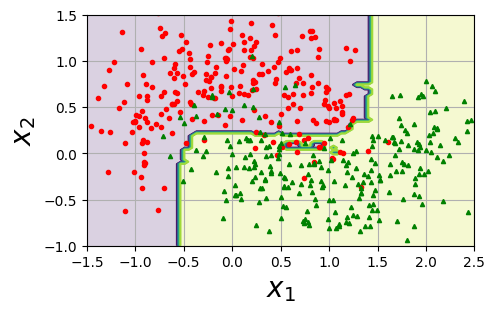

In [29]:
plt.figure(figsize=(5, 3))
plot_decision_boundary(rnd_clf, x, y, [-1.5, 2.5, -1, 1.5])
plt.show()

## ExtraTreesClassofier()

In [30]:
from sklearn.ensemble import ExtraTreesClassifier

ext_clf = ExtraTreesClassifier(random_state=1)
ext_clf.fit(x_train, y_train)
ext_clf.score(x_test, y_test), ext_clf.feature_importances_

(0.856, array([0.44116652, 0.55883348]))

## RandomForestRegressor()

In [31]:
np.random.seed(1)

m = 200
x = np.random.rand(m, 1)
y = 4 * (x[:, 0] - 0.5) ** 2 + np.random.randn(m) / 10

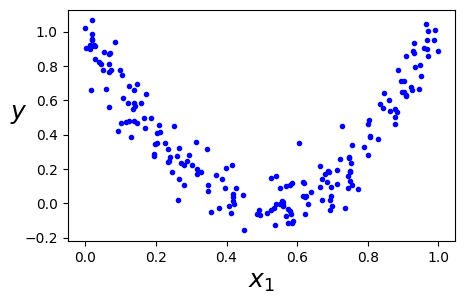

In [32]:
plt.figure(figsize=(5, 3))
plt.plot(x, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [35]:
from sklearn.ensemble import RandomForestRegressor

rnd_reg = RandomForestRegressor(
  n_estimators=500, # 幾棵樹
  max_leaf_nodes=16,
  oob_score=True,
  random_state=1
)

rnd_reg.fit(x_train, y_train)

rnd_reg.score(x_train, y_train), rnd_reg.score(x_test, y_test)

(0.9417364410547316, 0.9157119465346966)

In [36]:
rnd_reg.oob_score_

0.8746177182126228

In [38]:
rnd_reg.feature_importances_

array([1.])

In [41]:
def plot_regression_predictions(model, x, y, axes=[0, 1, -0.2, 1]):
  x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
  y_pred = model.predict(x1)

  plt.plot(x, y, "b.")
  plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

  plt.axis(axes)
  plt.xlabel("$x_1$", fontsize=18)
  plt.ylabel("$y$", rotation=0, fontsize=18)
  plt.legend(loc="upper center", fontsize=18)

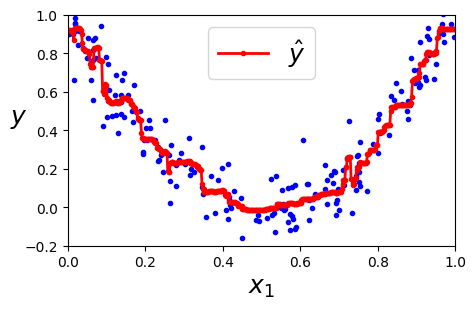

In [42]:
plt.figure(figsize=(5, 3))
plot_regression_predictions(rnd_reg, x, y)
plt.show()

## ExtraTreesRegressror()

In [44]:
from sklearn.ensemble import ExtraTreesRegressor

ext_reg = ExtraTreesRegressor(random_state=1)
ext_reg.fit(x_train, y_train)
ext_reg.score(x_test, y_test), ext_reg.feature_importances_

(0.8723823510592347, array([1.]))